# Try Not To Overfit;
## an analysis of Don't Overfit! data using data science methods


## Data Exposition and Documentation

I used a single CSV data file, labeled overfitting.csv, throughout the course of this project.

The data file contains 20000 rows of data, each with a unique identifier in the column "case_id" numbered in integers from 1 to 20000 inclusive. Out of these identified rows, only case_id 1 through 250 inclusive form the training set, while the 251-10000 are the test set.

Each case has values for 200 distinct variables, labeled in ascending order from var_1 to var_200. These values are numerical and are real numbers, recorded to 3 decimal places, between 0 and 1 inclusive.

The data file also contains three "Target" columns, representing the sole outcome (either 1 or 0) derived from the data:
    - Target_Practice, with the outcomes for all 20000 rows
    - Target_Leaderboard, with only the outcomes for the training data
    - Target_Evaluate

For purposes of generating the model, I only used the Target_Leaderboard outcomes as a training set, and the rest of the rows as the test set.



## What I intend to find from the data:

- Formation of equation which derived the data and outcomes
- Using said equation in Bayesian analysis as model (simplest method, prevents data from fitting too tightly)
    - Formation of model and likelihood
    - Formation of prior distribution
    - Bayes' rule ==> formation of posterior distribution as result of analysis
- Consequently, all of the objective lies with how the data was generated.

## What I know so far for methodology
- Since I'm using Bayesian analysis from the start, the bulk of the work lies in forming the equation
- Usage of forum information - is it acceptable in the foreground?

## Data Exploration and Visualization

We visibly have a classification problem here - the outcome is a simple 1 or 0. 
Possible techniques to be used: Naive Bayes, SVM, discrimination algorithm

In [69]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline
# imports and visualization tools

df = pd.read_csv('overfittingALT.csv', dtype=None)

In [70]:
TRG = df.head(250)
# formation of training data
TRF = df.sample(n=10, random_state=1)
# formation of subset to get a heatmap out
TRH = TRG.Target_Leaderboard
# isolation of outcomes
TRU = df.tail(19750)

In [71]:
TRH

0      1
1      0
2      0
3      1
4      1
5      0
6      0
7      1
8      1
9      1
10     0
11     0
12     1
13     0
14     1
15     1
16     1
17     1
18     0
19     0
20     1
21     0
22     0
23     1
24     0
25     1
26     0
27     0
28     0
29     1
      ..
220    0
221    0
222    0
223    1
224    0
225    1
226    0
227    0
228    1
229    0
230    0
231    1
232    1
233    1
234    0
235    0
236    1
237    0
238    0
239    0
240    0
241    1
242    0
243    1
244    0
245    1
246    1
247    0
248    1
249    0
Name: Target_Leaderboard, dtype: int64

In [72]:
TRI = TRG.drop(TRG.columns[[0, 1, 2, 3, 4]], axis=1)
TRI

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
0,0.660,0.106,0.434,0.387,0.903,0.661,0.158,0.291,0.210,0.936,...,0.015,0.377,0.479,0.050,0.395,0.123,0.833,0.461,0.990,0.105
1,0.844,0.813,0.030,0.939,0.721,0.287,0.539,0.874,0.787,0.732,...,0.112,0.048,0.088,0.860,0.560,0.346,0.511,0.883,0.858,0.599
2,0.560,0.567,0.568,0.434,0.414,0.180,0.448,0.888,0.023,0.690,...,0.874,0.236,0.599,0.602,0.005,0.493,0.122,0.395,0.782,0.943
3,0.681,0.245,0.909,0.785,0.738,0.570,0.692,0.411,0.182,0.520,...,0.219,0.691,0.261,0.031,0.968,0.353,0.798,0.104,0.944,0.090
4,0.846,0.431,0.805,0.237,0.465,0.642,0.219,0.102,0.795,0.131,...,0.704,0.242,0.089,0.605,0.577,0.043,0.686,0.070,0.666,0.572
5,0.961,0.910,0.399,0.860,0.883,0.032,0.618,0.694,0.155,0.138,...,0.027,0.296,0.362,0.983,0.348,0.509,0.447,0.803,0.911,0.998
6,0.695,0.171,0.725,0.053,0.294,0.333,0.616,0.501,0.825,0.356,...,0.526,0.337,0.126,0.530,0.691,0.026,0.761,0.770,0.784,0.556
7,0.984,0.907,0.207,0.042,0.518,0.585,0.585,0.913,0.131,0.307,...,0.680,0.429,0.691,0.813,0.405,0.695,0.821,0.889,0.030,0.513
8,0.531,0.511,0.160,0.383,0.389,0.787,0.034,0.901,0.666,0.714,...,0.608,0.712,0.135,0.102,0.180,0.946,0.837,0.031,0.533,0.713
9,0.302,0.582,0.290,0.460,0.257,0.388,0.115,0.510,0.787,0.002,...,0.572,0.906,0.799,0.870,0.096,0.038,0.534,0.522,0.820,0.079


In [73]:
TRV = TRU.drop(TRU.columns[[0, 1, 2, 3, 4]], axis=1)
TRV

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,var_200
250,0.182,0.056,0.033,0.237,0.405,0.001,0.605,0.552,0.620,0.131,...,0.131,0.726,0.343,0.725,0.569,0.001,0.001,0.553,0.929,0.640
251,0.181,0.976,0.024,0.513,0.331,0.459,0.021,0.436,0.075,0.949,...,0.105,0.170,0.414,0.802,0.964,0.441,0.310,0.237,0.543,0.303
252,0.173,0.556,0.113,0.261,0.547,0.938,0.701,0.545,0.807,0.075,...,0.324,0.393,0.600,0.176,0.546,0.083,0.718,0.516,0.699,0.359
253,0.939,0.956,0.318,0.925,0.215,0.451,0.107,0.989,0.987,0.499,...,0.362,0.178,0.056,0.882,0.710,0.247,0.762,0.278,0.233,0.793
254,0.023,0.041,0.549,0.280,0.514,0.964,0.844,0.456,0.050,0.412,...,0.431,0.383,0.701,0.659,0.738,0.582,0.994,0.363,0.126,0.168
255,0.237,0.877,0.103,0.928,0.137,0.894,0.156,0.713,0.199,0.710,...,0.885,0.448,0.723,0.449,0.306,0.566,0.485,0.065,0.996,0.126
256,0.158,0.235,0.171,0.799,0.794,0.613,0.429,0.103,0.900,0.491,...,0.720,0.888,0.071,0.897,0.977,0.003,0.318,0.631,0.605,0.885
257,0.628,0.087,0.335,0.651,0.710,0.946,0.689,0.049,0.387,0.556,...,0.070,0.797,0.965,0.852,0.708,0.527,0.094,0.760,0.352,0.743
258,0.254,0.110,0.064,0.571,0.126,0.670,0.102,0.551,0.159,0.909,...,0.711,0.348,0.386,0.864,0.345,0.100,0.428,0.104,0.780,0.575
259,0.910,0.183,0.221,0.474,0.797,0.017,0.475,0.688,0.478,0.258,...,0.561,0.292,0.584,0.687,0.124,0.510,0.451,0.771,0.070,0.335


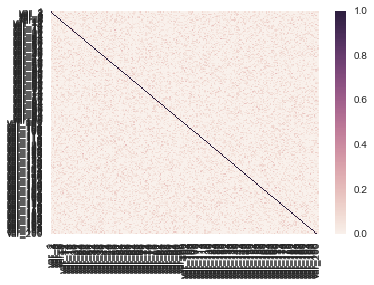

In [74]:
sns.heatmap(TRI.corr(), vmin=0, vmax=1)

# Values would be standardized --> "good way of looking at it"

In [75]:
from sklearn.preprocessing import StandardScaler
TRIste = StandardScaler().fit_transform(TRI)

In [76]:
TRIste


array([[ 0.48913928, -1.29958635, -0.19854151, ..., -0.12800175,
         1.79905289, -1.29735482],
       [ 1.11226389,  1.03250721, -1.60151444, ...,  1.2773666 ,
         1.32887243,  0.35006717],
       [ 0.15048459,  0.2210574 ,  0.266801  , ..., -0.34779869,
         1.05816248,  1.49725981],
       ..., 
       [-0.61826153,  0.64987234, -0.56317556, ..., -1.65325934,
         0.25315655, -0.53367135],
       [ 1.21386029, -1.42163368,  0.81896114, ..., -1.02717107,
         0.66634543, -0.16350163],
       [ 0.49591237,  1.1182702 ,  0.07580221, ..., -1.55668189,
         0.61291584, -0.10347411]])

In [77]:
TRC = np.cov(TRIste.T)
TRC

# Covariance matrix formed.

array([[ 1.00401606,  0.07299314,  0.12064063, ...,  0.02926711,
         0.0496253 ,  0.05281246],
       [ 0.07299314,  1.00401606, -0.02740843, ...,  0.0464714 ,
        -0.03283767, -0.00184031],
       [ 0.12064063, -0.02740843,  1.00401606, ...,  0.11114946,
        -0.04734901, -0.05403651],
       ..., 
       [ 0.02926711,  0.0464714 ,  0.11114946, ...,  1.00401606,
         0.09167021,  0.02737362],
       [ 0.0496253 , -0.03283767, -0.04734901, ...,  0.09167021,
         1.00401606, -0.03761831],
       [ 0.05281246, -0.00184031, -0.05403651, ...,  0.02737362,
        -0.03761831,  1.00401606]])

In [78]:
TRIC = np.corrcoef(TRIste.T)
TRIC
# Normalized covariance matrix, which is the correlation matrix.
# 

array([[ 1.        ,  0.07270117,  0.12015807, ...,  0.02915005,
         0.0494268 ,  0.05260121],
       [ 0.07270117,  1.        , -0.0272988 , ...,  0.04628552,
        -0.03270632, -0.00183295],
       [ 0.12015807, -0.0272988 ,  1.        , ...,  0.11070487,
        -0.04715961, -0.05382036],
       ..., 
       [ 0.02915005,  0.04628552,  0.11070487, ...,  1.        ,
         0.09130353,  0.02726412],
       [ 0.0494268 , -0.03270632, -0.04715961, ...,  0.09130353,
         1.        , -0.03746783],
       [ 0.05260121, -0.00183295, -0.05382036, ...,  0.02726412,
        -0.03746783,  1.        ]])

In [79]:
eig_vals, eig_vecs = np.linalg.eig(TRC.T)
# Generating eigenvalues and eigenvectors. 

eig_vecs

array([[  8.74279409e-02,   6.76010072e-02,  -8.56098330e-02, ...,
         -1.62296042e-02,   1.38325105e-02,   1.50444501e-02],
       [  1.58653387e-02,  -4.49019829e-03,   1.13348112e-02, ...,
         -2.60570139e-02,  -6.93345855e-02,  -3.66333607e-02],
       [  6.65352224e-02,  -3.78369655e-03,  -7.97599679e-02, ...,
          1.46720629e-01,  -1.15594216e-01,  -2.97423602e-02],
       ..., 
       [ -1.21749992e-04,   6.05704112e-03,  -1.18656629e-01, ...,
          8.12816536e-02,   3.23077306e-02,  -8.55076158e-02],
       [  2.45652913e-02,   6.69921158e-02,  -1.20928099e-01, ...,
          2.93557218e-02,  -1.27647794e-01,  -9.31540976e-02],
       [  7.41841933e-03,   1.98964010e-03,   1.06523781e-02, ...,
          9.52150160e-02,  -1.32796083e-01,   6.86792308e-02]])

In [80]:
for ev in eig_vecs:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))
print('HOOYAH!')

HOOYAH!


In [81]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort()
eig_pairs.reverse()

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
3.49405608652
3.44121637386
3.30173814652
3.24882616749
3.07852644711
3.05777140257
2.98131800058
2.96069710791
2.92286445865
2.88489877809
2.85665959328
2.80861213174
2.78531525019
2.69062929146
2.64472302153
2.60279468959
2.55405375545
2.51457179997
2.47341493114
2.41700661563
2.40222840065
2.35984803476
2.35176906619
2.32064242862
2.28137056871
2.2216253342
2.19644391651
2.16150492999
2.14245139552
2.10909932865
2.10429375951
2.05640878572
1.97608674374
1.95621673521
1.91037824679
1.89288073454
1.88665963954
1.84864178227
1.83984271437
1.82203281216
1.79663918259
1.7828369962
1.74015684505
1.72494578796
1.7173076348
1.65320258618
1.64027142099
1.63883957554
1.61899549116
1.58127041727
1.56549714962
1.55794541434
1.52656133935
1.51954999654
1.50170908172
1.45684982613
1.44882776926
1.41457533888
1.40687359525
1.38317522872
1.37973706868
1.35557224928
1.31823264417
1.30250686986
1.27689370842
1.26556850626
1.23444892917
1.21356730607
1.18609155153
1.17

In [82]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print var_exp
print cum_var_exp

[1.740039931087634, 1.713725754181904, 1.6442655969675817, 1.617915431408131, 1.5331061706595552, 1.5227701584823135, 1.4846963642894755, 1.4744271597376073, 1.4555865004092872, 1.4366795914875057, 1.4226164774519603, 1.3986888416078818, 1.3870869945921331, 1.3399333871485639, 1.3170720647223186, 1.2961917554149263, 1.2719187702116859, 1.2522567563873384, 1.2317606357067792, 1.2036692945823595, 1.1963097435254657, 1.1752043213108059, 1.1711809949634822, 1.1556799294531519, 1.1361225432165618, 1.1063694164303919, 1.0938290704199585, 1.0764294551356974, 1.0669407949712852, 1.0503314656660818, 1.0479382922357412, 1.0240915752878954, 0.98409119838328984, 0.97419593413585992, 0.95136836690044824, 0.94265460579932048, 0.93955650048970396, 0.92062360756842121, 0.91624167175494742, 0.90737234045713266, 0.89472631292860771, 0.88785282410848254, 0.86659810883550659, 0.85902300240608387, 0.85521920213172398, 0.82329488791987815, 0.81685516765314725, 0.81614210862061154, 0.8062597545968313, 0.7874

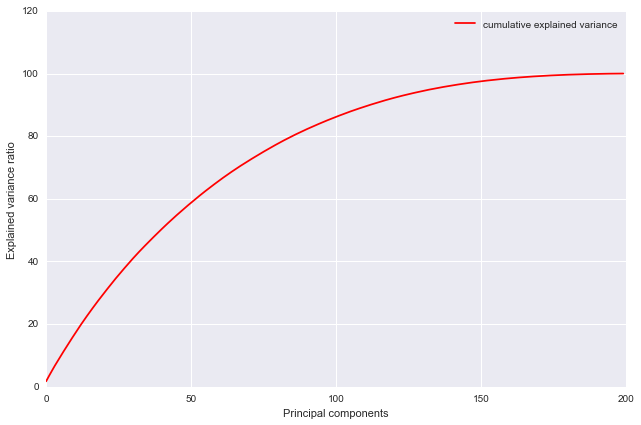

In [83]:
import matplotlib.pyplot as plt
import bisect

plt.figure(figsize=(9, 6))

xx = np.arange(0, 200)

plt.plot(xx, cum_var_exp, label='cumulative explained variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [84]:
index_of_nearest_width = bisect.bisect_left(cum_var_exp, 60) 
print index_of_nearest_width

52


0.756735898274


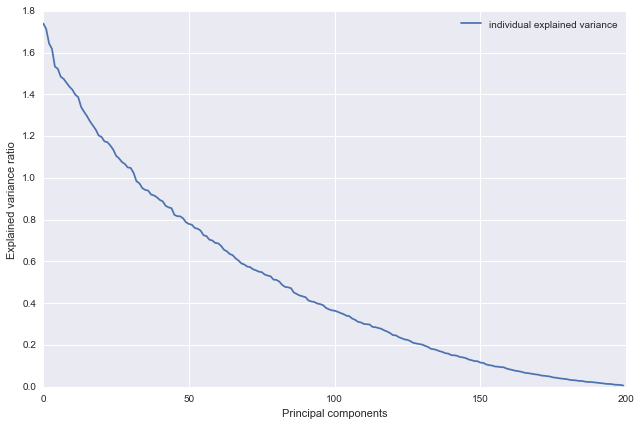

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize=(9, 6))

plt.plot(xx, var_exp, label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

index_of_nearest_width = bisect.bisect_right(xx, 52) 
width_val = var_exp[index_of_nearest_width]
print width_val

With this calculation, the threshold is 0.756735898274.

Consequentially, only 52 variables are needed




In [86]:
#unsorted eigenvalues

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

for i in eig_pairs:
    print(i[0]) 

3.49405608652
3.44121637386
3.30173814652
3.24882616749
3.07852644711
3.05777140257
2.98131800058
2.96069710791
2.92286445865
2.88489877809
2.85665959328
2.80861213174
2.78531525019
2.69062929146
2.64472302153
2.60279468959
2.55405375545
2.51457179997
2.47341493114
2.41700661563
2.40222840065
2.35984803476
2.35176906619
2.32064242862
2.28137056871
2.2216253342
2.19644391651
2.05640878572
2.10429375951
2.10909932865
2.14245139552
2.16150492999
1.97608674374
1.95621673521
1.91037824679
1.89288073454
1.88665963954
1.79663918259
1.84864178227
1.82203281216
1.83984271437
1.7828369962
1.64027142099
1.74015684505
1.65320258618
1.72494578796
1.7173076348
1.56549714962
1.58127041727
1.61899549116
1.63883957554
1.51954999654
1.52656133935
1.50170908172
1.55794541434
1.44882776926
1.45684982613
1.38317522872
1.41457533888
1.40687359525
1.35557224928
1.37973706868
1.30250686986
1.31823264417
1.27689370842
1.26556850626
1.23444892917
1.18609155153
1.21356730607
1.17543906391
1.12949616753
1.1193411

## Modelling and critical model selection

Reducing dimensionality of the model by only selecting the most relevant variables.
Relevance was determined through forming an elbow curve from the eigenvectors to reduce the dimensions as greatly as possible.

At 60% total explained variance, 52 was the ideal number of principal components I identified; this corresponded to a maximum threshold of 0.756735898274 for my eigenvectors.

From here, I intended to get the components directly; however, this did not yield any relevant results.

### Identifying the components

From here, I went on to create a Generalised Linear Model in order to determine the impact of each variable on the resultant sum.

Running loops on all variables

Mindset: take variables, if I remove V1 and run the model I will get an error

PCA is difficult in this case

Use corresponding eigenvalues = confusing

Find the columns that explain more
--> look at the column itself

Your model = generalized linear model?
    -> the equation itself is linear!
    -> GLM will get me a few variables that determine the relevance of each variable
    -> For loops within call of GLM.

In [91]:
# Creation of GLM

from sklearn import linear_model
clf = linear_model.LinearRegression()
cc = []

for i in range(0, 200):
    clftrain_X = TRI.ix[:,i].values # variables list
    clftrain_y = TRH.values # outcomes list

    clftrain_X = clftrain_X.reshape((250,1))
    clftrain_y = clftrain_y.reshape((250,1))

    clf.fit(clftrain_X, clftrain_y)
    
    ce = clf.coef_.item()

    cd = (ce, i)
    
    cc.append(cd)

print cc


[(0.08790730493111981, 0), (-0.1839229901896564, 1), (-0.0802783119740393, 2), (-0.019121322901642274, 3), (-0.06731378437396648, 4), (-0.16339689219654221, 5), (-0.0230722111130079, 6), (-0.2332914521476309, 7), (-0.03178073189261401, 8), (-0.20918883458273563, 9), (0.023237461158459333, 10), (0.03565728368441973, 11), (0.03855705709299511, 12), (-0.1732354461235636, 13), (-0.20632038500540623, 14), (-0.031030988715892417, 15), (0.06734563503945803, 16), (0.10563781918486223, 17), (0.02994488841762228, 18), (-0.13709371797197833, 19), (-0.11963885551397066, 20), (-0.2653479396364822, 21), (-0.01115937751172485, 22), (-0.009176549811759405, 23), (-0.07844116423807447, 24), (0.06419566547587245, 25), (-0.0686588033507671, 26), (-0.0876045036769388, 27), (-0.1301360417070899, 28), (-0.11627615552673855, 29), (-0.04551463438585254, 30), (-0.0541729170766057, 31), (-0.32454095904675506, 32), (0.21229452920705066, 33), (0.005752291890623707, 34), (-0.2920915485691215, 35), (0.03395617158765

In [92]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

for i in range(0, 200):
    clftrain_X = TRI.ix[:,i].values # variables list
    clftrain_y = TRH.values # outcomes list

    clftrain_X = clftrain_X.reshape((250,1))
    clftrain_y = clftrain_y.reshape((250,1))

    clf.fit(clftrain_X, clftrain_y)
    
    print i
    print clf.coef_

0
[[ 0.0879073]]
1
[[-0.18392299]]
2
[[-0.08027831]]
3
[[-0.01912132]]
4
[[-0.06731378]]
5
[[-0.16339689]]
6
[[-0.02307221]]
7
[[-0.23329145]]
8
[[-0.03178073]]
9
[[-0.20918883]]
10
[[ 0.02323746]]
11
[[ 0.03565728]]
12
[[ 0.03855706]]
13
[[-0.17323545]]
14
[[-0.20632039]]
15
[[-0.03103099]]
16
[[ 0.06734564]]
17
[[ 0.10563782]]
18
[[ 0.02994489]]
19
[[-0.13709372]]
20
[[-0.11963886]]
21
[[-0.26534794]]
22
[[-0.01115938]]
23
[[-0.00917655]]
24
[[-0.07844116]]
25
[[ 0.06419567]]
26
[[-0.0686588]]
27
[[-0.0876045]]
28
[[-0.13013604]]
29
[[-0.11627616]]
30
[[-0.04551463]]
31
[[-0.05417292]]
32
[[-0.32454096]]
33
[[ 0.21229453]]
34
[[ 0.00575229]]
35
[[-0.29209155]]
36
[[ 0.03395617]]
37
[[-0.10148338]]
38
[[-0.31230139]]
39
[[-0.16996719]]
40
[[-0.03303817]]
41
[[ 0.08428907]]
42
[[ 0.10728879]]
43
[[-0.02816366]]
44
[[ 0.03848178]]
45
[[ 0.06263289]]
46
[[ 0.13330384]]
47
[[-0.12337346]]
48
[[-0.16744153]]
49
[[-0.1127095]]
50
[[-0.22810709]]
51
[[-0.02233743]]
52
[[-0.12597236]]
53
[[-0

In [94]:
ccs = sorted(cc)
ccr = sorted(cc, reverse=True)

In [124]:
# top 52 negative values

ccsa = ccs[:52]

ccsa.sort(key=lambda x: x[1])

ccsa_vars = [x[1] for x in ccsa]

ccsa_coef = [x[0] for x in ccsa]

In [123]:
# top 52 positive variables

ccra = ccr[:52]

ccra.sort(key=lambda x: x[1])

ccra_vars = [x[1] for x in ccra]

ccra_coef = [x[0] for x in ccra]

### Forming the equation

As a primary source, the competition organizers gave the following clues to the equation:
    - The equation is linear
    - The equation does not have any noise
    - All variables are of the same sign
    - It is explicitly stated that the data is randomly generated.

From this, I conclude that the equation was formed as:

y = C_1 x var_1 + C_2 x var_2 + ..., with C being the coefficients derived, and var being the relevant variables.

Furthermore, as the data was randomly generated, it is a safe conjecture that the outcome of 1 / 0 is entirely dependent on the equation.

In [131]:
# Fitting the equations:

# Positive
TRIP = TRI[ccra_vars]

#Negative
TRIN = TRI[ccsa_vars]

In [159]:
outcome = 0

#Positive equation

for i in range(200):
    outcome += TRIP.ix[i]*ccra_coef[i]

print outcome

IndexError: list index out of range

In [160]:
outcome = 0

#Positive equation

for i in range(200):
    outcome += TRIN.ix[i]*ccra_coef[i]

print outcome

IndexError: list index out of range

### Testing the equation

I determined that 1 indicated that the value was ____, and 0 indicated the inverse.